In [1]:
from ipynb.fs.full.koselleck import *

[Koselleck] (15:02:48) Alles bereit (+0.0s)


In [2]:

def get_historical_semantic_distance_matrix(
        words=None,
        df_dists=None,
        dist_key='lnm',
        ymin=YMIN,
        ymax=YMAX,
        ybin=YEARBIN,
        interpolate=False,
        normalize=False,
        num_proc=1,
        progress=True,
        add_missing_periods=True,
        **lnm_opts):
    
    try:
        df_dists=lnm(words,**lnm_opts)
        odfi=df_dists.groupby(['period1','period2']).mean().reset_index()
        odfi[f'{dist_key}_perc']=odfi[dist_key].rank(ascending=True) / len(odfi) * 100
        odfi=odfi.append(odfi.assign(period1=odfi.period2,period2=odfi.period1))

        if add_missing_periods:
            all_periods = set(get_default_periods(ymin=ymin,ymax=ymax,ybin=ybin))
            missing_periods = all_periods - set(odfi.period1) - set(odfi.period2)
            odfi=odfi.append(pd.DataFrame([
                dict(period1=p1, period2=p2, dist_key=np.nan, dist_key_perc=np.nan)
                for p1 in missing_periods
                for p2 in missing_periods
                if p1!=p2
            ]))
        
        odfp=odfi.pivot('period1','period2',f'{dist_key}_perc')#.fillna(0)
        if interpolate:
            for idx in odfp.index:
                odfp.loc[idx] = odfp.loc[idx].interpolate(limit_direction='both')
            for col in odfp.columns:
                odfp[col] = odfp[col].interpolate(limit_direction='both')
            odfp=odfp.replace({0:np.nan})
        if normalize:
            for col in odfp.columns:
#                 odfp[col]=(odfp[col] - odfp[col].mean()) / odfp[col].std()
                odfp[col]=(odfp[col] / odfp[col].sum())# * 100# / odfp[col].std()
            
        return odfp
    except KeyError:
        return pd.DataFrame()


In [3]:
get_historical_semantic_distance_matrix('ancestor',interpolate=True,force=False)

period2,1720-1725,1725-1730,1730-1735,1735-1740,1740-1745,1745-1750,1750-1755,1755-1760,1760-1765,1765-1770,...,1850-1855,1855-1860,1860-1865,1865-1870,1870-1875,1875-1880,1880-1885,1885-1890,1890-1895,1895-1900
period1,,,,,,,,,,,,,,,,,,,,,
1720-1725,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,...,66.329966,63.973064,61.616162,59.259259,56.902357,54.545455,54.545455,54.545455,54.545455,54.545455
1725-1730,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,...,66.329966,63.973064,61.616162,59.259259,56.902357,54.545455,54.545455,54.545455,54.545455,54.545455
1730-1735,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,...,66.329966,63.973064,61.616162,59.259259,56.902357,54.545455,54.545455,54.545455,54.545455,54.545455
1735-1740,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,...,66.329966,63.973064,61.616162,59.259259,56.902357,54.545455,54.545455,54.545455,54.545455,54.545455
1740-1745,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,...,66.329966,63.973064,61.616162,59.259259,56.902357,54.545455,54.545455,54.545455,54.545455,54.545455
1745-1750,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,...,66.329966,63.973064,61.616162,59.259259,56.902357,54.545455,54.545455,54.545455,54.545455,54.545455
1750-1755,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,...,66.329966,63.973064,61.616162,59.259259,56.902357,54.545455,54.545455,54.545455,54.545455,54.545455
1755-1760,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,...,66.329966,63.973064,61.616162,59.259259,56.902357,54.545455,54.545455,54.545455,54.545455,54.545455
1760-1765,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,75.757576,...,66.329966,63.973064,61.616162,59.259259,56.902357,54.545455,54.545455,54.545455,54.545455,54.545455


In [4]:
get_historical_semantic_distance_matrix('station',interpolate=True,force=False,normalize=True)

period2,1720-1725,1725-1730,1730-1735,1735-1740,1740-1745,1745-1750,1750-1755,1755-1760,1760-1765,1765-1770,...,1850-1855,1855-1860,1860-1865,1865-1870,1870-1875,1875-1880,1880-1885,1885-1890,1890-1895,1895-1900
period1,,,,,,,,,,,,,,,,,,,,,
1720-1725,0.003695,0.004572,0.026943,0.026151,0.013454,0.015812,0.019622,0.014032,0.034481,0.028844,...,0.024996,0.024126,0.025312,0.031966,0.042268,0.043768,0.045997,0.037125,0.040469,0.048969
1725-1730,0.003695,0.012211,0.017313,0.034804,0.009497,0.002323,0.008927,0.005387,0.022869,0.040381,...,0.026412,0.014401,0.027620,0.030383,0.026639,0.040600,0.027564,0.030516,0.030917,0.018273
1730-1735,0.024964,0.019849,0.011672,0.005896,0.012047,0.023081,0.015468,0.015911,0.025120,0.009782,...,0.022942,0.025017,0.020234,0.024879,0.021756,0.026011,0.024032,0.028557,0.028907,0.025385
1735-1740,0.024784,0.040814,0.006031,0.015500,0.023214,0.031249,0.027400,0.028439,0.017418,0.004891,...,0.022376,0.021676,0.013387,0.014928,0.015096,0.013256,0.004307,0.014931,0.012149,0.006391
1740-1745,0.013789,0.012043,0.013326,0.025105,0.019829,0.014013,0.022097,0.006515,0.003792,0.025834,...,0.035050,0.038305,0.041391,0.038148,0.038094,0.044268,0.037555,0.035738,0.035777,0.035197
1745-1750,0.019016,0.003457,0.029958,0.039654,0.016443,0.016074,0.021389,0.020045,0.025238,0.055932,...,0.032360,0.036894,0.041006,0.038827,0.040314,0.046019,0.044705,0.040960,0.046167,0.047529
1750-1755,0.020007,0.011263,0.017022,0.029479,0.021983,0.018135,0.021920,0.031822,0.033651,0.046025,...,0.027545,0.030213,0.028081,0.028272,0.019980,0.032347,0.023429,0.027170,0.034185,0.024125
1755-1760,0.010094,0.004795,0.012353,0.021586,0.004572,0.011990,0.022450,0.018918,0.005688,0.027339,...,0.013454,0.010244,0.021388,0.017642,0.018381,0.018008,0.018002,0.011423,0.012065,0.005311
1760-1765,0.026226,0.021522,0.020621,0.013979,0.002814,0.015962,0.025102,0.006014,0.006458,0.007650,...,0.023721,0.020043,0.028620,0.028649,0.026018,0.016007,0.019725,0.024070,0.023712,0.010532


## Plot

In [5]:
def plot_distmat(distdf,xcol='period1',ycol='period2',value_name='lnm_perc',use_color=False,xlim=None,ylim=None,title='Distance matrix',ofn=None,invert=False,**y):
    distdfm=distdf.reset_index().melt(id_vars=[xcol],value_name=value_name)#.dropna()
    
    fig=start_fig(
        distdfm,
        x=f'factor({xcol})',
        y=f'factor({ycol})',
        fill=value_name,
        **y
    )
    fig+=p9.geom_tile()
    if not use_color:
        if not invert:
            fig+=p9.scale_fill_gradient(high='#111111',low='#FFFFFF')   
        else:
            fig+=p9.scale_fill_gradient(low='#111111',high='#FFFFFF')   
    else:
        fig+=p9.scale_fill_distiller(type='div',palette=5)
    fig+=p9.theme(
        axis_text_x=p9.element_text(angle=90)
    )
    fig+=p9.labs(
        x='Date of semantic model',
        y='Date of semantic model',
        fill='Semantic distance\n(LNM percentile)',
        title=title
    )
    if ofn:
        ofnfn=os.path.join(PATH_FIGS,ofn)
        fig.save(ofnfn)
        upfig(ofnfn)
        #fig.save(os.path.join('/home/ryan/Markdown/Drafts/TheGreatAbstraction/figures', ofn))
        
    return fig


def plot_historical_semantic_distance_matrix(words,save=False,dist_key='lnm',interpolate=False,vnum='v35',**y):
    wstr=words.strip() if type(words)==str else '-'.join(words)
    wstr2=words.strip() if type(words)==str else ', '.join(words)
    return plot_distmat(
        get_historical_semantic_distance_matrix(
            words,
            dist_key=dist_key,
            interpolate=interpolate,
            **y
        ),
        figure_size=(8,8),
        ofn=f'fig.distmat.{wstr}.{vnum}.png' if save else None,
        title=f'Historical-semantic distance matrix for ‘{wstr2}’',
        
    )



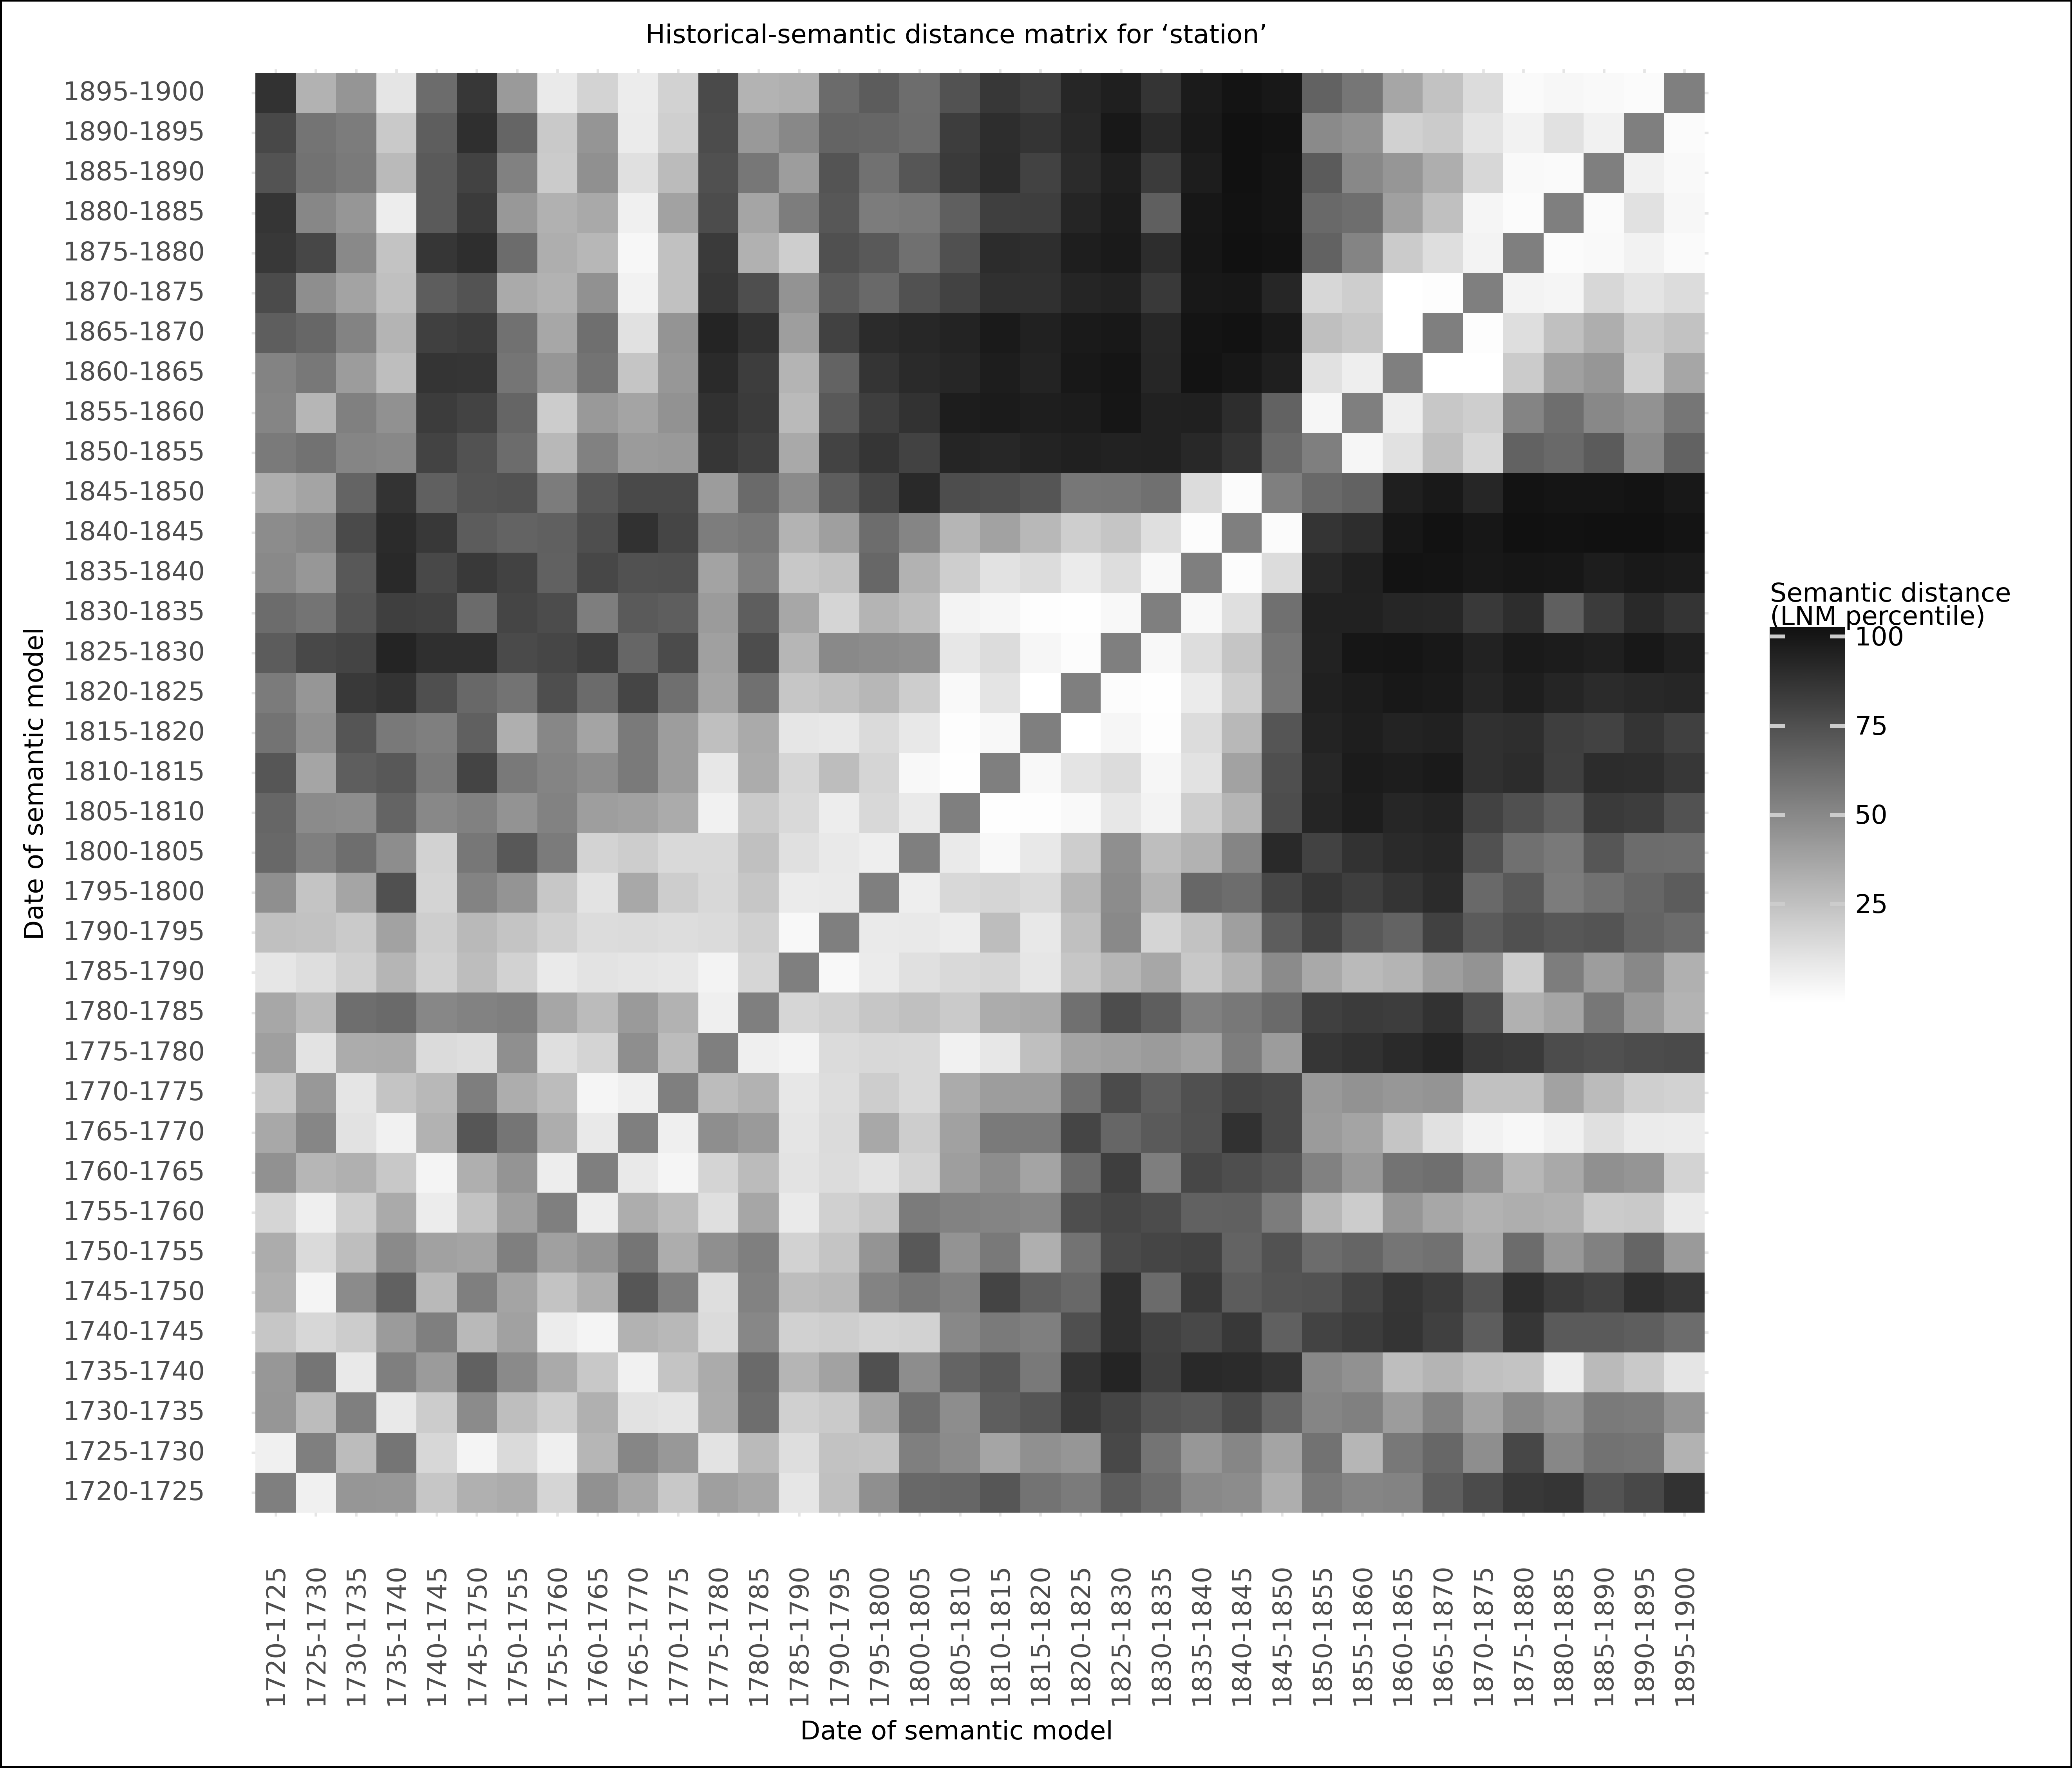

<ggplot: (8760030802921)>

In [6]:
plot_historical_semantic_distance_matrix('station')